# Linear Regression
- Trong file này em sẽ chọn lọc các feature cần thiết để build model Linear regression và tìm ra đường hồi quy tốt nhất cho sự thay đổi giá Open của cổ phiếu Apple, từ đó dự đoán giá cổ phiếu Open vào ngày hôm sau là bao nhiêu

## 1. Import những thư viện cần thiết
- Numpy, pandas để xử lí dữ liệu
- matplotlib.pyplot để vẽ biểu đồ
- LinearRegression model từ sklearn

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 2 Xử lí dữ liệu và xây dựng mô hình, dự đoán giá cổ phiếu

- Đọc dữ liệu đã qua xử lí từ file price.csv, tìm tất cả thương hiệu trong file

In [59]:
df = pd.read_csv('data/price.csv')
df['Ticker'].unique()

array(['AAPL', 'MSFT', 'GOOG', 'AMZN', 'BRK-A', 'TSLA', 'UNH', 'JNJ',
       'XOM', 'V'], dtype=object)

- Chọn dữ liệu của thương hiệu Apple để train mô hình

In [60]:
df_AAPL = df.loc[df['Ticker']=='AAPL']
df_AAPL

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2018-12-03,46.115002,46.235001,45.302502,46.205002,44.595947,163210000,AAPL
1,2018-12-04,45.237499,45.597500,44.067501,44.172501,42.634228,165377200,AAPL
2,2018-12-06,42.939999,43.695000,42.605000,43.680000,42.158878,172393600,AAPL
3,2018-12-07,43.372501,43.622501,42.075001,42.122501,40.655613,169126400,AAPL
4,2018-12-10,41.250000,42.522499,40.832500,42.400002,40.923454,248104000,AAPL
...,...,...,...,...,...,...,...,...
1003,2022-11-28,145.139999,146.639999,143.380005,144.220001,144.220001,69246000,AAPL
1004,2022-11-29,144.289993,144.809998,140.350006,141.169998,141.169998,83763800,AAPL
1005,2022-11-30,141.399994,148.720001,140.550003,148.029999,148.029999,111380900,AAPL
1006,2022-12-01,148.210007,149.130005,146.610001,148.309998,148.309998,71250400,AAPL


- Tách data thành features X và label y, do dự đoán cho ngày hôm sau nên X sẽ lấy từ đầu đến dòng kế cuối, y sẽ từ dòng thứ hai đến dòng cuối.

In [61]:
X,y = df_AAPL[:-1].drop(columns=['Ticker','Date']), df_AAPL['Open'][1:]
X

,Open,High,Low,Close,Adj Close,Volume
0,46.115002,46.235001,45.302502,46.205002,44.595947,163210000
1,45.237499,45.597500,44.067501,44.172501,42.634228,165377200
2,42.939999,43.695000,42.605000,43.680000,42.158878,172393600
3,43.372501,43.622501,42.075001,42.122501,40.655613,169126400
4,41.250000,42.522499,40.832500,42.400002,40.923454,248104000
...,...,...,...,...,...,...
1002,148.309998,148.880005,147.119995,148.110001,148.110001,35195900
1003,145.139999,146.639999,143.380005,144.220001,144.220001,69246000
1004,144.289993,144.809998,140.350006,141.169998,141.169998,83763800
1005,141.399994,148.720001,140.550003,148.029999,148.029999,111380900


- Chia dữ liệu thành tập train và test với train/test là 80/20

In [62]:
train_size = round(0.8*len(df_AAPL))
data_train,data_test=X.iloc[:train_size],X.iloc[train_size:]
X_train,y_train,X_test,y_test = np.array(X.iloc[:train_size]),np.array(y.iloc[:train_size]),np.array(X.iloc[train_size:]),np.array(y.iloc[train_size:])

- Tạo model linear để train trên tập train và predict trên tập test, tính độ lỗi RMSE.

In [63]:
LR = LinearRegression()
LR.fit(X_train,y_train)
y_pred =LR.predict(X_test)
rmse=np.sqrt(np.mean(np.power((np.array(y_test)-np.array(y_pred)),2)))
print(rmse)

1.8258106916732346


- Vẽ biểu đồ thể hiện giá cổ phiếu và giá dự đoán

C:\Users\trann\AppData\Local\Temp\ipykernel_14624\509882007.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['Predictions'] = y_pred


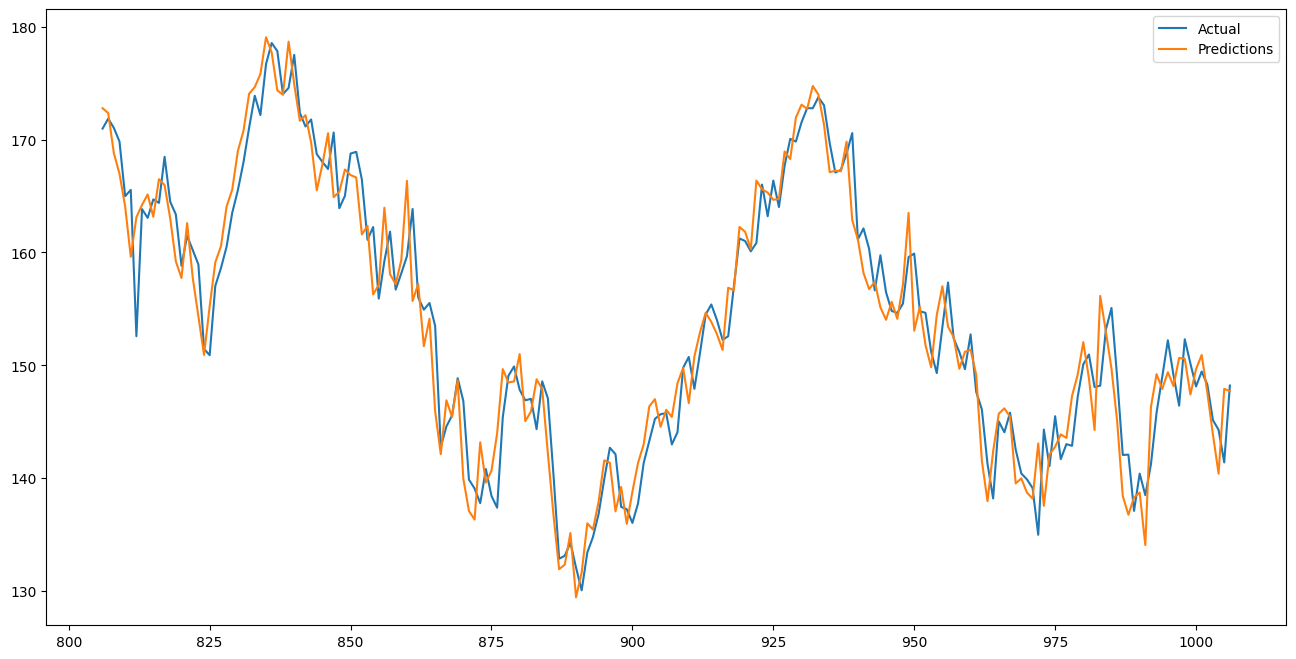

In [64]:
plt.figure(figsize=(16,8))
data_test['Predictions'] = y_pred
plt.plot(data_test[['Open', 'Predictions']])
plt.legend(['Actual', 'Predictions'], loc='upper right')